In [1]:
import mlrose
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from textwrap import wrap

In [2]:
df = pd.read_csv('AP_Analytics.csv', delimiter=',', quotechar='"')


df = pd.get_dummies(df)
# print(df)

X = df.loc[:, df.columns != 'Chance of Admit ']
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [3]:
# one_hot = OneHotEncoder(categories='auto')

# y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
# y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()
y_train_hot = y_train
y_test_hot = y_test

# Testing Decay Function - Geometric 

In [4]:
# numberofIter = list(range(100, 20000, 400))
# testError = []
# trainError = []
# for n in numberofIter :
#     nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [13, 13, 13], activation ='sigmoid', 
#                                  algorithm ='simulated_annealing', 
#                                  max_iters = n, bias = True, is_classifier = True, 
#                                  learning_rate = .0001, early_stopping = True, schedule = mlrose.GeomDecay())
#     nn_model1.fit(X_train_scaled, y_train_hot)
#     y_train_pred = nn_model1.predict(X_train_scaled)
#     train_error = 1 - accuracy_score(y_train_hot, y_train_pred)
# #     print(y_train_hot)
#     trainError.append(train_error)
#     y_test_pred = nn_model1.predict(X_test_scaled)
#     test_error = 1 - accuracy_score(y_test_hot, y_test_pred)
#     testError.append(test_error)
#     print(n, train_error, test_error)

# Setup for training
train_size = len(X_train)
offsets = range(int(1),int(3000), 100)

train_err = [0] * len(offsets)
test_err = [0] * len(offsets)

for i, o in enumerate(offsets):
        print('learning a neural net with training_set_size=' + str(o))
        print('getting data')
        X_train_temp = X_train[:o].copy()
        y_train_temp = y_train[:o].copy()
        X_test_temp = X_test[:o].copy()
        y_test_temp = y_test[:o].copy()
        print('building net')
        
        # Initialize neural network object and fit object - Randomized Hill Climbing
        np.random.seed(3)
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [13], activation ='sigmoid', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = offsets[i], bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, schedule = mlrose.GeomDecay())
        print('training')
        nn_model1.fit(X_train, y_train_hot)
        print('validating')
        y_train_pred = nn_model1.predict(X_train)
        y_test_pred = nn_model1.predict(X_test)
        train_err[i] = mean_squared_error(y_train_hot, y_train_pred)
        test_err[i] = mean_squared_error(y_test_hot, y_test_pred)

        print('train_err: ' + str(train_err[i]))
        print('test_err: ' + str(test_err[i]))
        print('---')

learning a neural net with training_set_size=1
getting data
building net
training
validating
train_err: 0.42857142857142855
test_err: 0.4066666666666667
---
learning a neural net with training_set_size=101
getting data
building net
training
validating
train_err: 0.4342857142857143
test_err: 0.41333333333333333
---
learning a neural net with training_set_size=201
getting data
building net
training
validating
train_err: 0.45714285714285713
test_err: 0.4533333333333333
---
learning a neural net with training_set_size=301
getting data
building net
training
validating
train_err: 0.4857142857142857
test_err: 0.4866666666666667
---
learning a neural net with training_set_size=401
getting data
building net
training
validating
train_err: 0.47714285714285715
test_err: 0.47333333333333333
---
learning a neural net with training_set_size=501
getting data
building net
training
validating
train_err: 0.46
test_err: 0.4533333333333333
---
learning a neural net with training_set_size=601
getting data
b

plotting results
plot complete


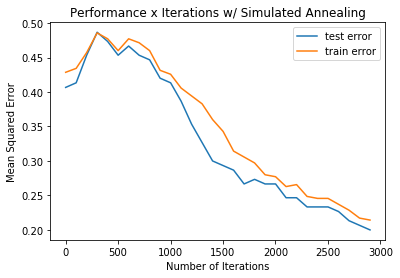

In [5]:
# plt.figure()
# title = "Simulated Annealing : Error x Number of Max Iterations - Geometric Decay"
# plt.title('\n'.join(wrap(title,60)))
# # plt.subplots_adjust(top=0.85)
# plt.plot(numberofIter, testError, '-', label='Test Error')
# plt.plot(numberofIter, trainError, '-', label='Train Error')
# plt.legend()
# plt.xlabel('Max Iterations')
# plt.ylabel('Error')
# filename = 'Geometric5.png'
# plt.savefig("SA/" + filename)

# Plot results
print('plotting results')
plt.figure()
title = 'Performance x Iterations w/ Simulated Annealing'
plt.title(title)
plt.plot(offsets, test_err, '-', label='test error')
plt.plot(offsets, train_err, '-', label='train error')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
print('plot complete')
### ---

# Testing Decay Function - Arithmetically  

In [6]:
# Setup for training
train_size = len(X_train)
offsets = range(int(1),int(3000), 100)

train_err = [0] * len(offsets)
test_err = [0] * len(offsets)

for i, o in enumerate(offsets):
        print('learning a neural net with training_set_size=' + str(o))
        print('getting data')
        X_train_temp = X_train[:o].copy()
        y_train_temp = y_train[:o].copy()
        X_test_temp = X_test[:o].copy()
        y_test_temp = y_test[:o].copy()
        print('building net')
        
        # Initialize neural network object and fit object - Randomized Hill Climbing
        np.random.seed(3)
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [13], activation ='sigmoid', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = offsets[i], bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, schedule = mlrose.ArithDecay())
        print('training')
        nn_model1.fit(X_train, y_train_hot)
        print('validating')
        y_train_pred = nn_model1.predict(X_train)
        y_test_pred = nn_model1.predict(X_test)
        train_err[i] = mean_squared_error(y_train_hot, y_train_pred)
        test_err[i] = mean_squared_error(y_test_hot, y_test_pred)

        print('train_err: ' + str(train_err[i]))
        print('test_err: ' + str(test_err[i]))
        print('---')


learning a neural net with training_set_size=1
getting data
building net
training
validating
train_err: 0.42857142857142855
test_err: 0.4066666666666667
---
learning a neural net with training_set_size=101
getting data
building net
training
validating
train_err: 0.4342857142857143
test_err: 0.41333333333333333
---
learning a neural net with training_set_size=201
getting data
building net
training
validating
train_err: 0.45714285714285713
test_err: 0.4533333333333333
---
learning a neural net with training_set_size=301
getting data
building net
training
validating
train_err: 0.4857142857142857
test_err: 0.4866666666666667
---
learning a neural net with training_set_size=401
getting data
building net
training
validating
train_err: 0.47714285714285715
test_err: 0.47333333333333333
---
learning a neural net with training_set_size=501
getting data
building net
training
validating
train_err: 0.4742857142857143
test_err: 0.4533333333333333
---
learning a neural net with training_set_size=601


plotting results
plot complete


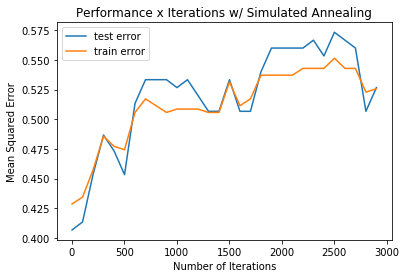

In [7]:
    # Plot results
    print('plotting results')
    plt.figure()
    title = 'Performance x Iterations w/ Simulated Annealing'
    plt.title(title)
    plt.plot(offsets, test_err, '-', label='test error')
    plt.plot(offsets, train_err, '-', label='train error')
    plt.legend()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Mean Squared Error')
    print('plot complete')
    ### ---

# Testing Decay Function - Exponential  

In [9]:
# Setup for training
train_size = len(X_train)
offsets = range(int(1),int(3000), 100)

train_err = [0] * len(offsets)
test_err = [0] * len(offsets)

for i, o in enumerate(offsets):
        print('learning a neural net with training_set_size=' + str(o))
        print('getting data')
        X_train_temp = X_train[:o].copy()
        y_train_temp = y_train[:o].copy()
        X_test_temp = X_test[:o].copy()
        y_test_temp = y_test[:o].copy()
        print('building net')
        
        # Initialize neural network object and fit object - Randomized Hill Climbing
        np.random.seed(3)
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [13], activation ='sigmoid', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = offsets[i], bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, schedule = mlrose.ExpDecay())
        print('training')
        nn_model1.fit(X_train, y_train_hot)
        print('validating')
        y_train_pred = nn_model1.predict(X_train)
        y_test_pred = nn_model1.predict(X_test)
        train_err[i] = mean_squared_error(y_train_hot, y_train_pred)
        test_err[i] = mean_squared_error(y_test_hot, y_test_pred)

        print('train_err: ' + str(train_err[i]))
        print('test_err: ' + str(test_err[i]))
        print('---')


learning a neural net with training_set_size=1
getting data
building net
training
validating
train_err: 0.42857142857142855
test_err: 0.4066666666666667
---
learning a neural net with training_set_size=101
getting data
building net
training
validating
train_err: 0.4342857142857143
test_err: 0.41333333333333333
---
learning a neural net with training_set_size=201
getting data
building net
training
validating
train_err: 0.45714285714285713
test_err: 0.4533333333333333
---
learning a neural net with training_set_size=301
getting data
building net
training
validating
train_err: 0.4857142857142857
test_err: 0.4866666666666667
---
learning a neural net with training_set_size=401
getting data
building net
training
validating
train_err: 0.47714285714285715
test_err: 0.47333333333333333
---
learning a neural net with training_set_size=501
getting data
building net
training
validating
train_err: 0.4742857142857143
test_err: 0.4533333333333333
---
learning a neural net with training_set_size=601


plotting results
plot complete


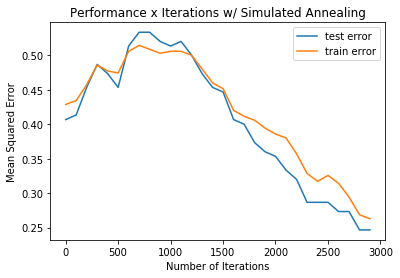

In [10]:
# Plot results
print('plotting results')
plt.figure()
title = 'Performance x Iterations w/ Simulated Annealing'
plt.title(title)
plt.plot(offsets, test_err, '-', label='test error')
plt.plot(offsets, train_err, '-', label='train error')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
print('plot complete')
### ---

# Runtime 

In [14]:
time = []
testError = []
trainError = []
print("start")
for i, o in enumerate(offsets):
    start = timer()
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [13], activation ='sigmoid', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = .0001, early_stopping = True, schedule = mlrose.GeomDecay())
    nn_model1.fit(X_train, y_train_hot)
    y_train_pred = nn_model1.predict(X_train)
    train_error = 1 - accuracy_score(y_train_hot, y_train_pred)
    trainError.append(train_error)
    y_test_pred = nn_model1.predict(X_test)
    test_error = 1 - accuracy_score(y_test_hot, y_test_pred)
    testError.append(test_error)
    end = timer()
    time.append(end - start)
    print(i, time[i])
print(time)


start
0 1.280098828000007
1 1.2819165049999697
2 1.2524947130000328
3 1.3180377470000053
4 1.2856391680000456
5 1.3138295539999945
6 1.3037009729999909
7 1.2419710710000231
8 1.2384257909999974
9 1.297252388000004
10 1.6420338070000184
11 1.3900708460000146
12 1.3459741089999966
13 1.3445040859999722
14 1.2967988590000346
15 1.4438292020000176
16 1.416983603999995
17 1.3322050379999837
18 1.350536276000014
19 1.3086242270000525
20 1.349338844999977
21 1.3279391659999646
22 1.3325234579999687
23 1.3594551790000082
24 1.3193619919999833
25 1.446026138000036
26 1.378229675
27 1.2982447829999728
28 1.4032398179999745
29 1.3760027140000375
[1.280098828000007, 1.2819165049999697, 1.2524947130000328, 1.3180377470000053, 1.2856391680000456, 1.3138295539999945, 1.3037009729999909, 1.2419710710000231, 1.2384257909999974, 1.297252388000004, 1.6420338070000184, 1.3900708460000146, 1.3459741089999966, 1.3445040859999722, 1.2967988590000346, 1.4438292020000176, 1.416983603999995, 1.3322050379999837,

In [15]:
print(sum(time)/len(time))

1.3425096186666698
